# Targets Areas
This notebook is to define the two simulation targeting areas for SDSS-v

In [1]:
from astropy import units as u
import numpy as np
from astropy.table import Table
%matplotlib inline
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
from K2fov import getKeplerFov
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

## Define TESS Southern CVZ
We are using a definition of eclpitci latitude < 66

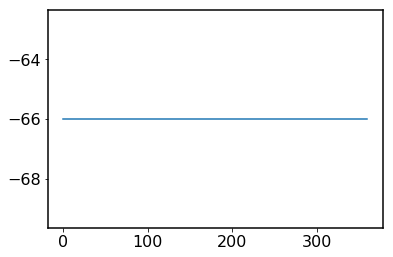

In [2]:
npts = 30
scvz_elong = np.linspace(0,360,npts)
scvz_elat = np.zeros(npts)-66
plt.plot(scvz_elong,scvz_elat)

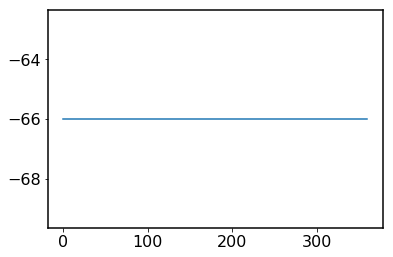

In [3]:
npts = 30
scvz_elong = np.linspace(0,360,npts)
scvz_elat = np.zeros(npts)-66
plt.plot(scvz_elong,scvz_elat)

In [4]:
#Create Skycoord Object
scvz_coord = SkyCoord(scvz_elong, scvz_elat,unit=(u.deg,u.deg),frame="barycentrictrueecliptic")

(-90, 90)

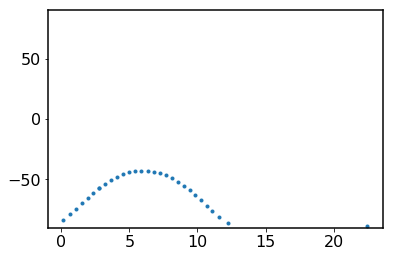

In [5]:
scvz_coord_fk5 = scvz_coord.transform_to(FK5())
scvz_coord_gal = scvz_coord.transform_to(Galactic())
plt.plot(scvz_coord_fk5.ra/15,scvz_coord_fk5.dec,'.')
plt.ylim(-90,90)

# The Same for North CVZ

In [6]:
npts = 30
ncvz_elong = np.linspace(0,360,npts)
ncvz_elat = np.zeros(npts)+66
#Create Skycoord Object
ncvz_coord = SkyCoord(ncvz_elong, ncvz_elat,unit=(u.deg,u.deg),frame="barycentrictrueecliptic")
ncvz_coord_fk5 = ncvz_coord.transform_to(FK5())
ncvz_coord_gal = ncvz_coord.transform_to(Galactic())

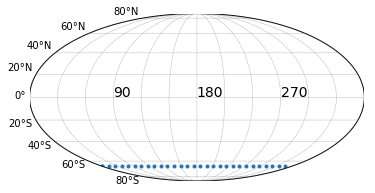

In [7]:
plt.rcParams.update({'font.size': 14})
bmap = Basemap(projection='moll', lon_0=180)
x,y = bmap(scvz_coord.lon,scvz_coord.lat)
bmap.scatter(x,y,marker='.')
bmap.drawparallels([-80, -60, -40, -20, 0, 20, 40, 60, 80], linewidth=0.5, color='grey',
                   labels=[1,0,0,0], fontsize=10, labelstyle='+/')
#RA lines
bmap.drawmeridians(np.arange(0., 360., 30.), linewidth=0.5, color='grey')
meridian = [90,180,270]
for i in range(len(meridian)):
    plt.annotate(np.str(meridian[i]),xy=bmap(meridian[i],0),xycoords='data')
plt.show()

[8555634d28m02.5054s 8475425d47m22.5688s 8541779d38m54.7797s
 8735108d05m39.5143s 9037113d11m26.7535s 9430667d43m29.2184s
 9899834d09m16.6505s 10429917d37m28.6271s 11007485d49m33.6457s
 11620318d35m51.2056s 12257277d14m19.5713s 12908105d38m24.5965s
 13563189d12m03.9468s 14213301d22m27.4092s 14849362d33m38.7681s
 15462225d03m44.9637s 16042484d26m21.37s 16580304d57m05.0992s
 17065239d53m46.2038s 17486056d37m25.9699s 17830903d31m43.9497s
 18092790d16m58.6338s 19397566d12m44.948s 13749653d17m31.8476s
 12066146d39m06.0955s 10824987d24m21.4005s 9904479d29m50.7883s
 9243664d16m14.4434s 8803705d15m42.9201s 8555634d28m02.5054s] [2437016d47m30.1604s 2786663d54m57.3667s 3103953d32m41.855s
 3380114d25m42.8619s 3607446d17m00.3715s 3779536d11m44.3239s
 3891472d56m45.3197s 3940031d52m26.3187s 3923806d06m43.7015s
 3843266d18m51.4646s 3700740d30m21.1812s 3500316d53m51.7805s
 3247683d07m35.0233s 2949923d22m45.7855s 2615299d29m07.4949s
 2253044d22m09.6628s 1873199d28m47.6278s 1486538d28m11.8122s
 1104653

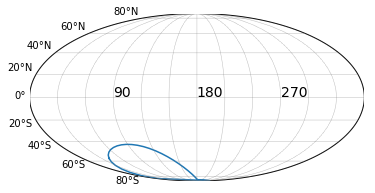

In [8]:
bmap = Basemap(projection='moll', lon_0=180)
x,y = bmap(scvz_coord_fk5.ra,scvz_coord_fk5.dec)
print(x,y)
bmap.plot(x,y)
bmap.drawparallels([-80, -60, -40, -20, 0, 20, 40, 60, 80], linewidth=0.5, color='grey',
                   labels=[1,0,0,0], fontsize=10, labelstyle='+/')
#RA lines
bmap.drawmeridians(np.arange(0., 360., 30.), linewidth=0.5, color='grey')
meridian = [90,180,270]
for i in range(len(meridian)):
    plt.annotate(np.str(meridian[i]),xy=bmap(meridian[i],0),xycoords='data')
plt.show()

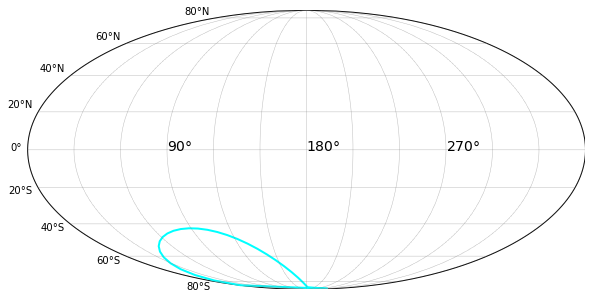

In [9]:
fig = plt.figure(figsize=(10,8))
ax = plt.gca()
bmap = Basemap(projection='moll', lon_0=180)
x,y = bmap(scvz_coord_fk5.ra,scvz_coord_fk5.dec)
vert = np.column_stack((x,y))
tess_patch = mpatches.Polygon(vert,fill=False,edgecolor='cyan',linewidth=2)
bmap.drawparallels([-80, -60, -40, -20, 0, 20, 40, 60, 80], linewidth=0.5, color='grey',
                   labels=[1,0,0,0], fontsize=10, labelstyle='+/')
#RA lines
bmap.drawmeridians(np.arange(0., 360., 30.), linewidth=0.5, color='grey')
meridian = [90,180,270]
for i in range(len(meridian)):
    plt.annotate(np.str(meridian[i])+'$\degree$',xy=bmap(meridian[i],0),xycoords='data')
ax.add_patch(tess_patch)
plt.show()

## Get Kepler field

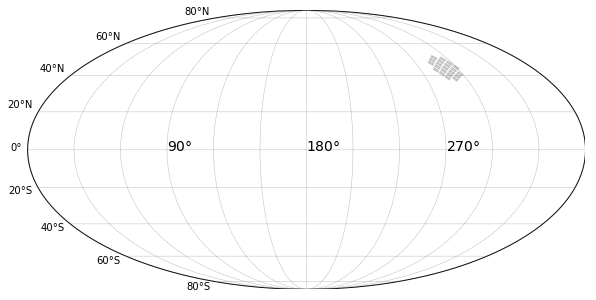

In [19]:
#In Equatorial Coordinates
fig = plt.figure(figsize=(10,8))
ax = plt.gca()
bmap = Basemap(projection='moll', lon_0=180,lat_0=0)
bmap.drawparallels([-80, -60, -40, -20, 0, 20, 40, 60, 80], linewidth=0.5, color='grey',
                   labels=[1,0,0,0], fontsize=10, labelstyle='+/')
#RA lines
bmap.drawmeridians(np.arange(0., 360., 30.), linewidth=0.5, color='grey')
meridian = [90,180,270]
for i in range(len(meridian)):
    plt.annotate(np.str(meridian[i])+'$\degree$',xy=bmap(meridian[i],0),xycoords='data')

campaign = 1000
fov = getKeplerFov(campaign)
corners = fov.getCoordsOfChannelCorners()

for ch in np.arange(1, 85, dtype=int):
    if ch in fov.brokenChannels:
        continue  # certain channel are no longer used
    idx = np.where(corners[::, 2] == ch)
    mdl = int(corners[idx, 0][0][0])
    out = int(corners[idx, 1][0][0])
    ra = corners[idx, 3][0]
    if campaign == 1002:  # Concept Engineering Test overlapped the meridian
        ra[ra < 180] += 360
    dec = corners[idx, 4][0]
    x,y = bmap(ra,dec)
    if ch == 1:
        ax.fill(np.concatenate((x, x[:1])), 
            np.concatenate((y, y[:1])),facecolor='gray',lw=.5,alpha=0.5,label="Kepler Field")
    else:
        #Adds the first x as final x to complete polygon
        ax.fill(np.concatenate((x, x[:1])),
            np.concatenate((y, y[:1])),facecolor='gray',lw=.5,alpha=0.5)
    if False:
        txt = "K2C{0}\n{1}.{2}\n#{3}".format(campaign, mdl, out, ch)
        txt = "{1}.{2}\n#{3}".format(campaign, mdl, out, ch)
        ax.text(np.mean(ra), np.mean(dec), txt,
                    ha="center", va="center",
                    zorder=91, fontsize=10,
                    color="#000000", clip_on=True)

## Load RV data

In [11]:
rm_tab = Table.read('BHM-Med_Cadence_LegacyRV_ecl.csv')
print(rm_tab.columns)
print()
RVtargets_tab = Table.read('AS4testtarg0.fits.csv')
print(RVtargets_tab.columns)

<TableColumns names=('FieldID','RA','DEC','l','b','Nqso','nVisits','VisitLen','1exp','2exp','4exp','Type','elong','elat')>

<TableColumns names=('APSTAR_ID','TARGET_ID','TELESCOPE','LOCATION_ID','FIELD','J','J_ERR','H','H_ERR','K','K_ERR','RA','DEC','GLON','GLAT','APOGEE_TARGET1','APOGEE_TARGET2','APOGEE_TARGET3','NVISITS','SNR','VHELIO_AVG','VSCATTER','VERR','VERR_MED','SYNTHVHELIO_AVG','SYNTHVSCATTER','SYNTHVERR','col27')>


3696.04018267


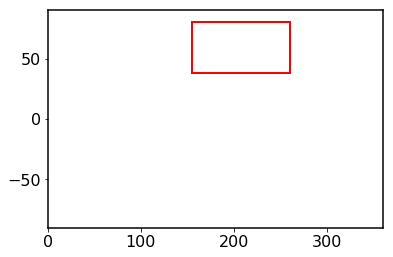

In [12]:
#RM Region
npts = 10
gal_l1 = 155
gal_l2 = 260
gal_b1 = 38
gal_b2 = 80

#TESS CVZ (3526.35319725)
#gal_l1 = 0
#gal_l2 = 360
#gal_b1 = 146
#gal_b2 = 180

#Area Calc
area = np.radians(gal_l2)-np.radians(gal_l1)
area = area * (-np.cos(np.radians(gal_b2))+np.cos(np.radians(gal_b1)))
print(area*180*180/np.pi/np.pi)

top_l = np.linspace(gal_l1,gal_l2,npts)
top_b = np.zeros(npts)+gal_b2
bot_l = np.linspace(gal_l2,gal_l1,npts) #Run backwards
bot_b = np.zeros(npts)+gal_b1

left_l = np.zeros(npts)+gal_l1
left_b = np.linspace(gal_b1,gal_b2,npts)
right_l = np.zeros(npts)+gal_l2
right_b = np.linspace(gal_b2,gal_b1,npts) #Run backwards

rm_l = np.concatenate((top_l,right_l,bot_l,left_l))*u.deg
rm_b = np.concatenate((top_b,right_b,bot_b,left_b))*u.deg
rm_coord_gal = SkyCoord(rm_l,rm_b,frame='galactic')
rm_coord_fk5 = rm_coord_gal.transform_to(FK5())

ax = plt.gca()
vert = np.column_stack((rm_l,rm_b))
rm_patch = mpatches.Polygon(vert,fill=False,edgecolor='red',linewidth=2)
ax.add_patch(rm_patch)
plt.xlim(0,360)
plt.ylim(-90,90)
plt.show()

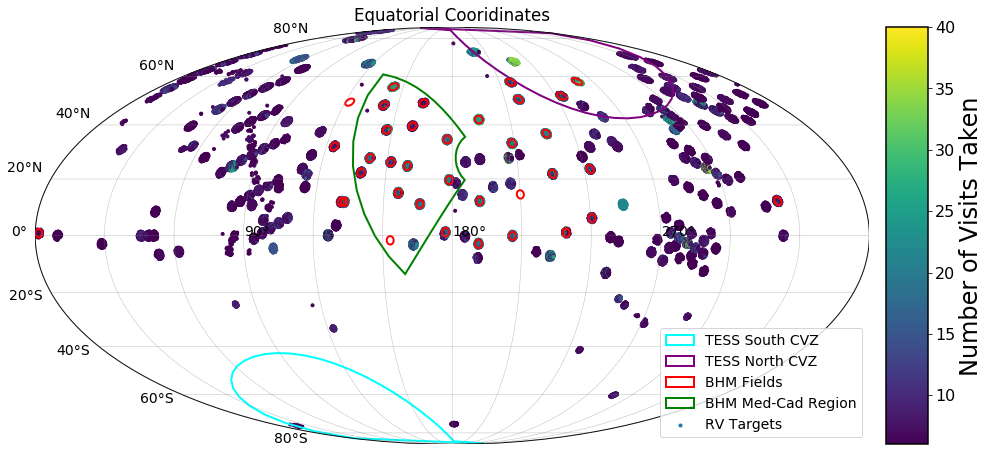

In [13]:
#In Equatorial Coordinates
fig = plt.figure(figsize=(16,12))
ax = plt.gca()
bmap = Basemap(projection='moll', lon_0=180,lat_0=0)
#Get TESS S CVZ
x,y = bmap(scvz_coord_fk5.ra,scvz_coord_fk5.dec)
vert = np.column_stack((x,y))
tess_patch = mpatches.Polygon(vert,fill=False,edgecolor='cyan',linewidth=2,label="TESS South CVZ")
ax.add_patch(tess_patch)

#Get TESS N CVZ
x,y = bmap(ncvz_coord_fk5.ra,ncvz_coord_fk5.dec)
vert = np.column_stack((x,y))
tess_patch = mpatches.Polygon(vert,fill=False,edgecolor='Purple',linewidth=2,label="TESS North CVZ")
ax.add_patch(tess_patch)

#Plot RV Targets
xrv,yrv = bmap(RVtargets_tab['RA'],RVtargets_tab['DEC'])
bmap.scatter(xrv,yrv,marker='.',c=RVtargets_tab['NVISITS'],label='RV Targets')
bmap.colorbar(location='right', label='Number of Visits Taken')

#Plot RM Fields
for i in range(len(rm_tab['RA'])):
    if i == 0:
        bmap.tissot(rm_tab[i]['RA'],rm_tab[i]['DEC'],1.49,30,fill=False,edgecolor='red',linewidth=2, label='BHM Fields')
    else:
        bmap.tissot(rm_tab[i]['RA'],rm_tab[i]['DEC'],1.49,30,fill=False,edgecolor='red',linewidth=2)

#Plot RM Region
x,y = bmap(rm_coord_fk5.ra,rm_coord_fk5.dec)
vert = np.column_stack((x,y))
rm_patch = mpatches.Polygon(vert,fill=False,edgecolor='green',linewidth=2,label="BHM Med-Cad Region")
ax.add_patch(rm_patch)

#Gal b lines
bmap.drawparallels([-80, -60, -40, -20, 0, 20, 40, 60, 80], linewidth=0.5, color='grey',
                   labels=[1,0,0,0], fontsize=14, labelstyle='+/')
#Gal l lines
bmap.drawmeridians(np.arange(0., 360., 30.), linewidth=0.5, color='grey')
meridian = [90,180,270]
for i in range(len(meridian)):
    plt.annotate(np.str(meridian[i])+'$\degree$',xy=bmap(meridian[i],0),xycoords='data')

plt.legend()
plt.title("Equatorial Cooridinates")
plt.savefig('Equatorial_regions.png')
plt.show()

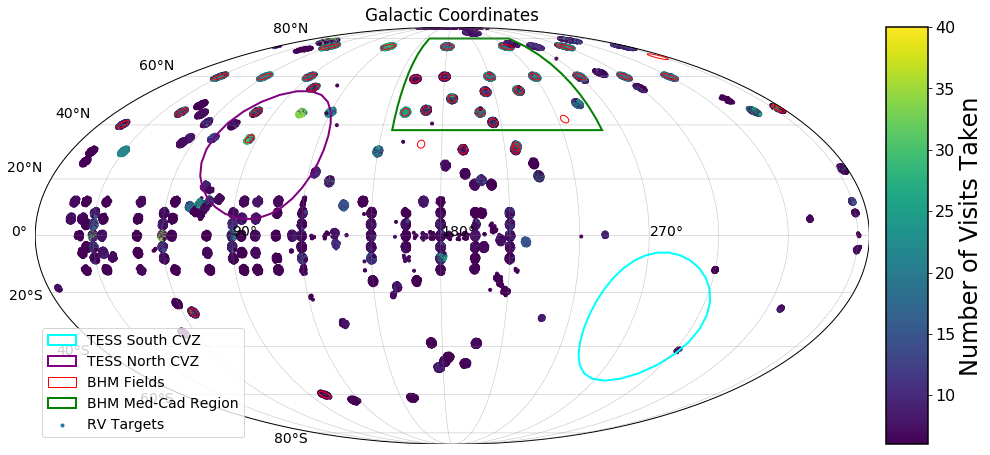

In [14]:
#Now in Galactic Coordinates
fig = plt.figure(figsize=(16,12))
ax = plt.gca()
bmap = Basemap(projection='moll', lon_0=185,lat_0=0)
#Get TESS S CVZ
x,y = bmap(scvz_coord_gal.l,scvz_coord_gal.b)
vert = np.column_stack((x,y))
tess_patch = mpatches.Polygon(vert,fill=False,edgecolor='cyan',linewidth=2,label="TESS South CVZ")
ax.add_patch(tess_patch)

#Get TESS N CVZ
x,y = bmap(ncvz_coord_gal.l,ncvz_coord_gal.b)
vert = np.column_stack((x,y))
tess_patch = mpatches.Polygon(vert,fill=False,edgecolor='Purple',linewidth=2,label="TESS North CVZ")
ax.add_patch(tess_patch)

#Plot RV Targets
xrv,yrv = bmap(RVtargets_tab['GLON'],RVtargets_tab['GLAT'])
bmap.scatter(xrv,yrv,marker='.',c=RVtargets_tab['NVISITS'],label='RV Targets')
bmap.colorbar(location='right', label='Number of Visits Taken')

#Plot RM Fields
for i in range(len(rm_tab['l'])):
    if i == 0:
        bmap.tissot(rm_tab[i]['l'],rm_tab[i]['b'],1.49,30,fill=False,edgecolor='red', label='BHM Fields')
    else:
        bmap.tissot(rm_tab[i]['l'],rm_tab[i]['b'],1.49,30,fill=False,edgecolor='red')

#Plot RM Region
x,y = bmap(rm_coord_gal.l,rm_coord_gal.b)
vert = np.column_stack((x,y))
rm_patch = mpatches.Polygon(vert,fill=False,edgecolor='green',linewidth=2,label="BHM Med-Cad Region")
ax.add_patch(rm_patch)

#Gal b lines
bmap.drawparallels([-80, -60, -40, -20, 0, 20, 40, 60, 80], linewidth=0.5, color='grey',
                   labels=[1,0,0,0], fontsize=14, labelstyle='+/')
#Gal l lines
bmap.drawmeridians(np.arange(0., 360., 30.), linewidth=0.5, color='grey')
meridian = [90,180,270]
for i in range(len(meridian)):
    plt.annotate(np.str(meridian[i])+'$\degree$',xy=bmap(meridian[i],0),xycoords='data')

plt.legend()
plt.title("Galactic Coordinates")
plt.savefig('Galactic_regions.png')
plt.show()

## Get ecliptic units for BHM fields

In [15]:
bhm_tab = Table.read('BHM-Med_Cadence_LegacyRV.csv')
bhm_tab

FieldID,RA,DEC,l,b,Nqso,nVisits,VisitLen,1exp,2exp,4exp,Type
str8,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,str11
030+60,225.405966,21.84719,30.0,60.0,39,6,4,282,123,234,halo
040+45,242.820309,23.56979,40.0,45.0,42,6,4,288,96,285,halo
060+60,226.583037,36.68303,60.0,60.0,50,6,2,231,34,0,halo
060+75,208.81774,33.04279,60.0,75.0,46,6,4,253,40,236,halo
080+45,243.628265,51.55376,80.0,45.0,56,6,4,239,193,260,halo
090+60,217.99294,50.20905,90.0,60.0,56,6,4,213,91,237,halo
100-60,1.624089,0.85557,100.0,-60.0,60,12,2,216,102,0,halo
120+75,193.881893,42.10496,120.0,75.0,57,6,4,300,2,254,halo
160+45,143.97704,55.54527,160.0,45.0,50,6,4,209,66,250,halo


In [16]:
bhm_tab_fk5 = SkyCoord(bhm_tab['RA'],bhm_tab['DEC'],unit=(u.deg,u.deg),frame='fk5')

In [17]:
bhm_tab_ecl = bhm_tab_fk5.transform_to(BarycentricTrueEcliptic())
bhm_tab['elong'] = bhm_tab_ecl.lon.deg
bhm_tab['elat'] = bhm_tab_ecl.lat.deg

In [18]:
bhm_tab.write('BHM-Med_Cadence_LegacyRV_ecl.csv',overwrite=True)